In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,
                                                 stratify=cancer.target,
                                                random_state=0)

## 기본 Decision model(분류)

In [3]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)
#모델에도 random_state를 줄 수 있다. 모델 선정 및 학습

DecisionTreeClassifier(random_state=0)

In [4]:
train_score = tree.score(x_train,y_train)
test_score= tree.score(x_test,y_test)
#model.score() 기준값은 분류모델이기 때문에 정확도(Accuracy)이다.

In [5]:
print('train:',train_score)
print('test:',test_score)

train: 1.0
test: 0.9020979020979021


### 가지치기

In [6]:
tree = DecisionTreeClassifier(max_depth =3,random_state=0)
tree.fit(x_train,y_train)
#의사결정나무 ,최대깊이=4, 모델 생성 및 학습

DecisionTreeClassifier(max_depth=3, random_state=0)

In [7]:
train_score = tree.score(x_train,y_train)
test_score= tree.score(x_test,y_test)
#model.score() 기준값은 분류모델이기 때문에 정확도(Accuracy)이다.

In [8]:
print('train:',train_score)
print('test:',test_score)

train: 0.9765258215962441
test: 0.916083916083916


In [9]:
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

!pip install python-graphviz

export_graphviz(tree,out_file='tree.dot',class_names=['악성','양성'],
               feature_names = cancer.feature_names, impurity=False,
               filled=True)
#tree.dot이라는 파일이 생성됨


with open('tree.dot',encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [10]:
from sklearn.tree import plot_tree

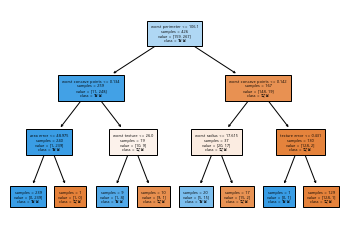

In [11]:
plot_tree(tree,class_names=['악성','양성'],
          feature_names=cancer.feature_names,
         impurity=False,filled=True,
         fontsize=4)
plt.show()
#sklearn.tree 안에 plot_tree를 import해서 시각화

### 특성중요도
- 특성중요도 : 0~1 사이의 값 / 0: 이 특성이 전혀 사용되지 않음, 1. 완벽하게 정답값을 예측함.
- 특성중요도의 전체 합 = 1

In [12]:
print('특성 중요도:\n',tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01069388
 0.         0.01090021 0.         0.         0.         0.
 0.         0.         0.04022023 0.03226776 0.79120523 0.
 0.         0.         0.         0.11471269 0.         0.        ]


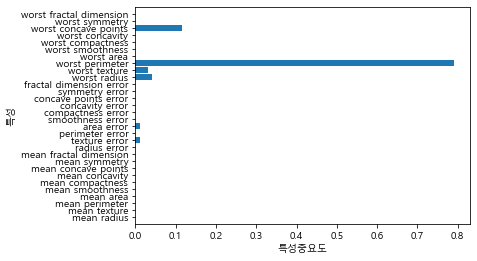

In [13]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('특성중요도')
plt.ylabel('특성')
plt.ylim(-1,n_features)
plt.show()

## Decision tree Regressor(회귀)

In [14]:
import os
import mglearn

In [15]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'ram_price.csv'))

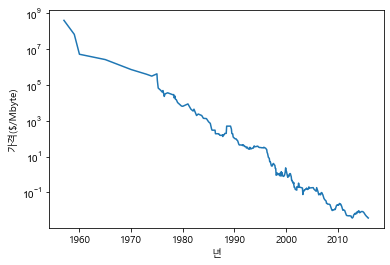

In [16]:
plt.yticks(fontname='Arial') #한국 폰트는 지수에 음수가 표현 불가
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격($/Mbyte)')
plt.show()

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [18]:
del ram_prices['Unnamed: 0']
ram_prices

,date,price
0,1957.00,4.110418e+08
1,1959.00,6.794772e+07
2,1960.00,5.242880e+06
3,1965.00,2.642412e+06
4,1970.00,7.340030e+05
...,...,...
328,2015.58,4.500000e-03
329,2015.67,4.300000e-03
330,2015.75,4.200000e-03
331,2015.83,3.800000e-03


In [19]:
#2000년 이전 데이터를 훈련데이터로, 
#2000년 이후 데이터를 평가하는 테스트 데이터로 사용

data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]

In [20]:
x_train = data_train.date.to_numpy()[:, np.newaxis]

In [21]:
y_train = np.log(data_train.price)
#숫자가 커서 편의를 위해 로그로 치환

In [22]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
linear_reg = LinearRegression().fit(x_train,y_train)

In [23]:
x_all = ram_prices.date.to_numpy()[:,np.newaxis]

In [24]:
pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)
#예측값

In [25]:
price_tree = np.exp(pred_tree)
price_lr=np.exp(pred_lr)

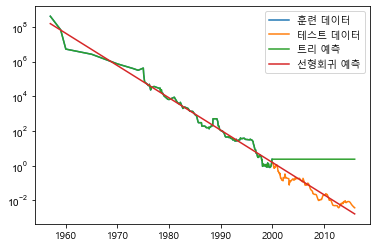

In [26]:
plt.yticks(fontname='Arial') #한국어 폰트로는 지수의 음수승을 표현불가능
plt.semilogy(data_train.date, data_train.price, label='훈련 데이터')
#y축을 log 스케일로 사용
plt.semilogy(data_test.date, data_test.price, label='테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label='트리 예측')
plt.semilogy(ram_prices.date, price_lr, label='선형회귀 예측')
plt.legend()
plt.show()

#과대적합 의심 훈련 데이터와 트리예측이 같음...
#트리 모델 같은 경우는 훈련데이터는 예측을 잘 하지만 
#잘 알지 못하는 데이터의 예측은 잘 못한다. 